In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data set
data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# Describing the data
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# Data Types
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [6]:
# Data Set Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
# Taking out required Columns for Analysis
data=data[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,...,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,...,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,...,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,...,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,...,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [9]:
# Returning Number of Missing values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill          10313
nwound         16311
dtype: int64

In [10]:
# Combining Two Columns i.e., 'nkill' and 'nwound' into a new column 'casualities'
data['nkill']=data['nkill'].fillna(0)
data['nwound']=data['nwound'].fillna(0)
data['casualities']=data['nkill']+data['nwound']
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill              0
nwound             0
casualities        0
dtype: int64

In [11]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,180132.000000,181311.000000,115571.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,127.686441,0.081440,0.049666,6.447325,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,89.299120,0.273511,1.093195,2.173435,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,101.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,173.000000,0.000000,0.000000,6.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,8191.000000,9574.000000


In [12]:
print(f"""
There are {data.country.nunique()} Countries from {data.region.nunique()} Regions covered in the dataset terrorist attack data in {data.claimed.nunique()} years from {data.iyear.min()} to {data.iyear.max()}. Overall {data.index.nunique()} terrorist attacks are recorded here which caused about {data.casualities.sum()} Casualities Consisted of {data.nkill.sum()} Kills and {data.nwound.sum()} Wounded.
""")


There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities Consisted of 411868.0 Kills and 523869.0 Wounded.



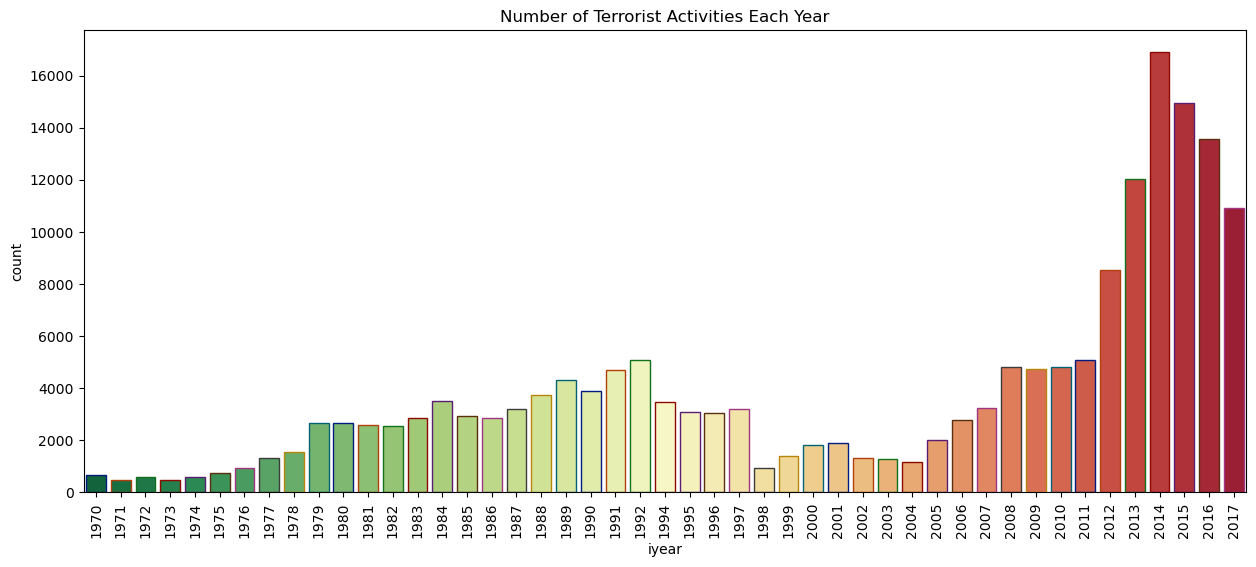

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot(x="iyear", data=data, palette="RdYlGn_r", edgecolor=sns.color_palette("dark", 10))
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

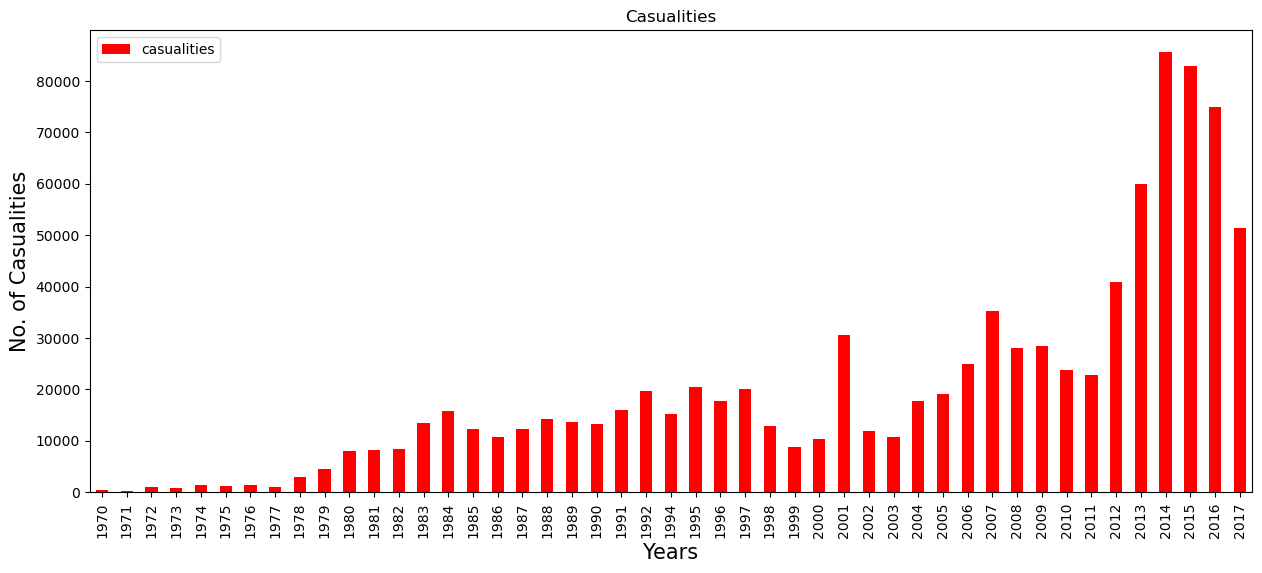

In [14]:
yearc=data[['iyear','casualities']].groupby('iyear').sum()
yearc.plot(kind='bar',color='red',figsize=(15,6))
plt.title("Casualities")
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Casualities',fontsize=15)
plt.show()

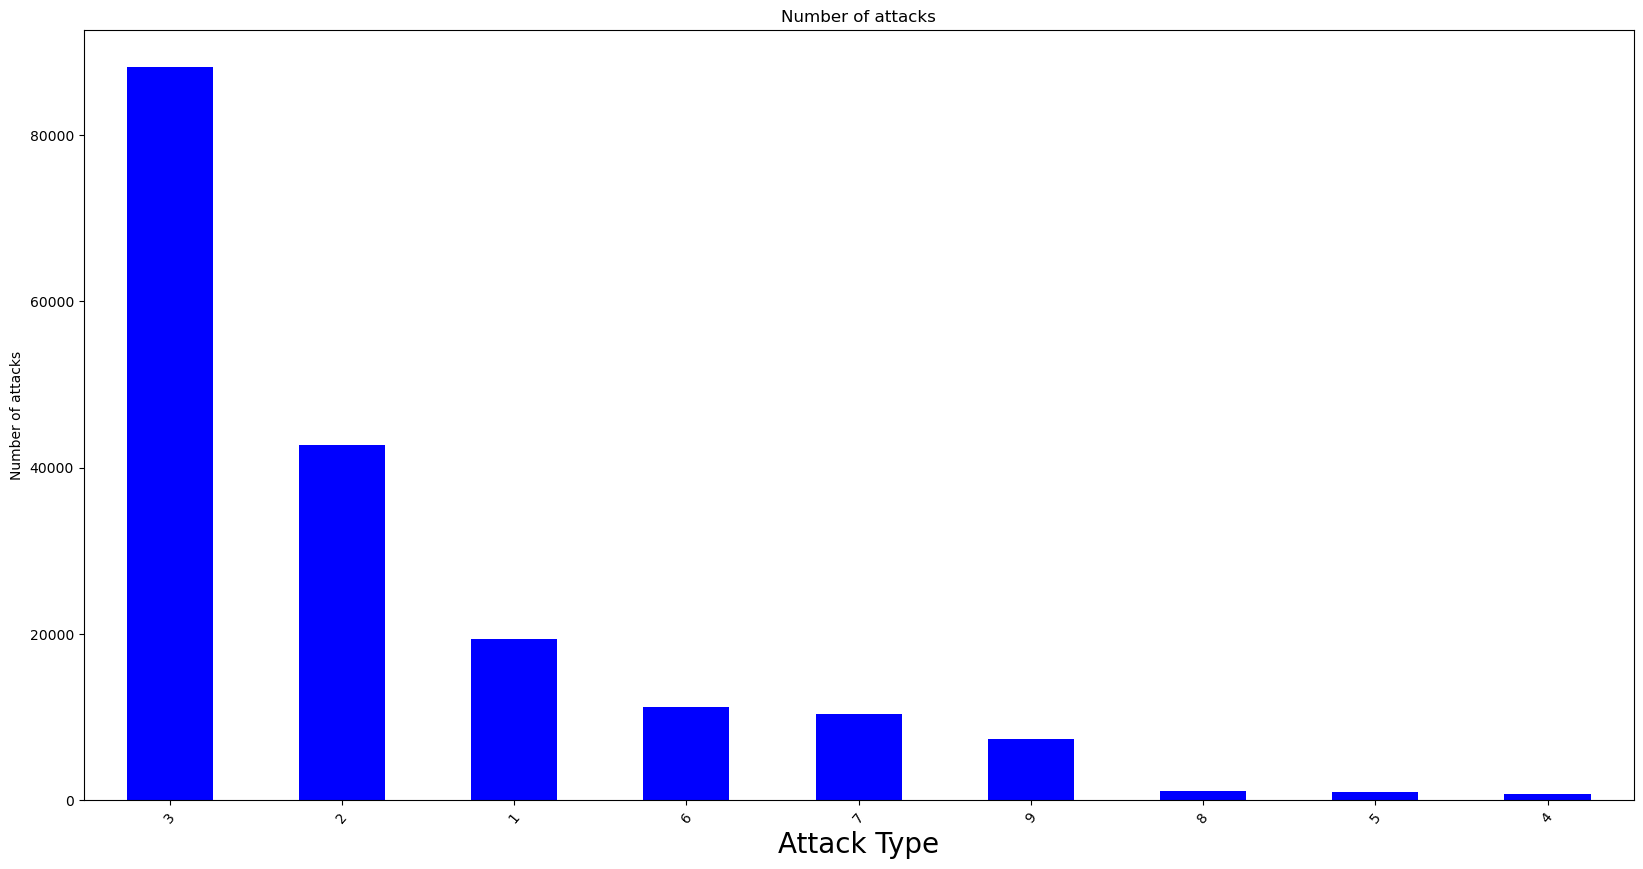

In [15]:
data['attacktype1'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Number of attacks')
plt.title('Number of attacks')
plt.show()

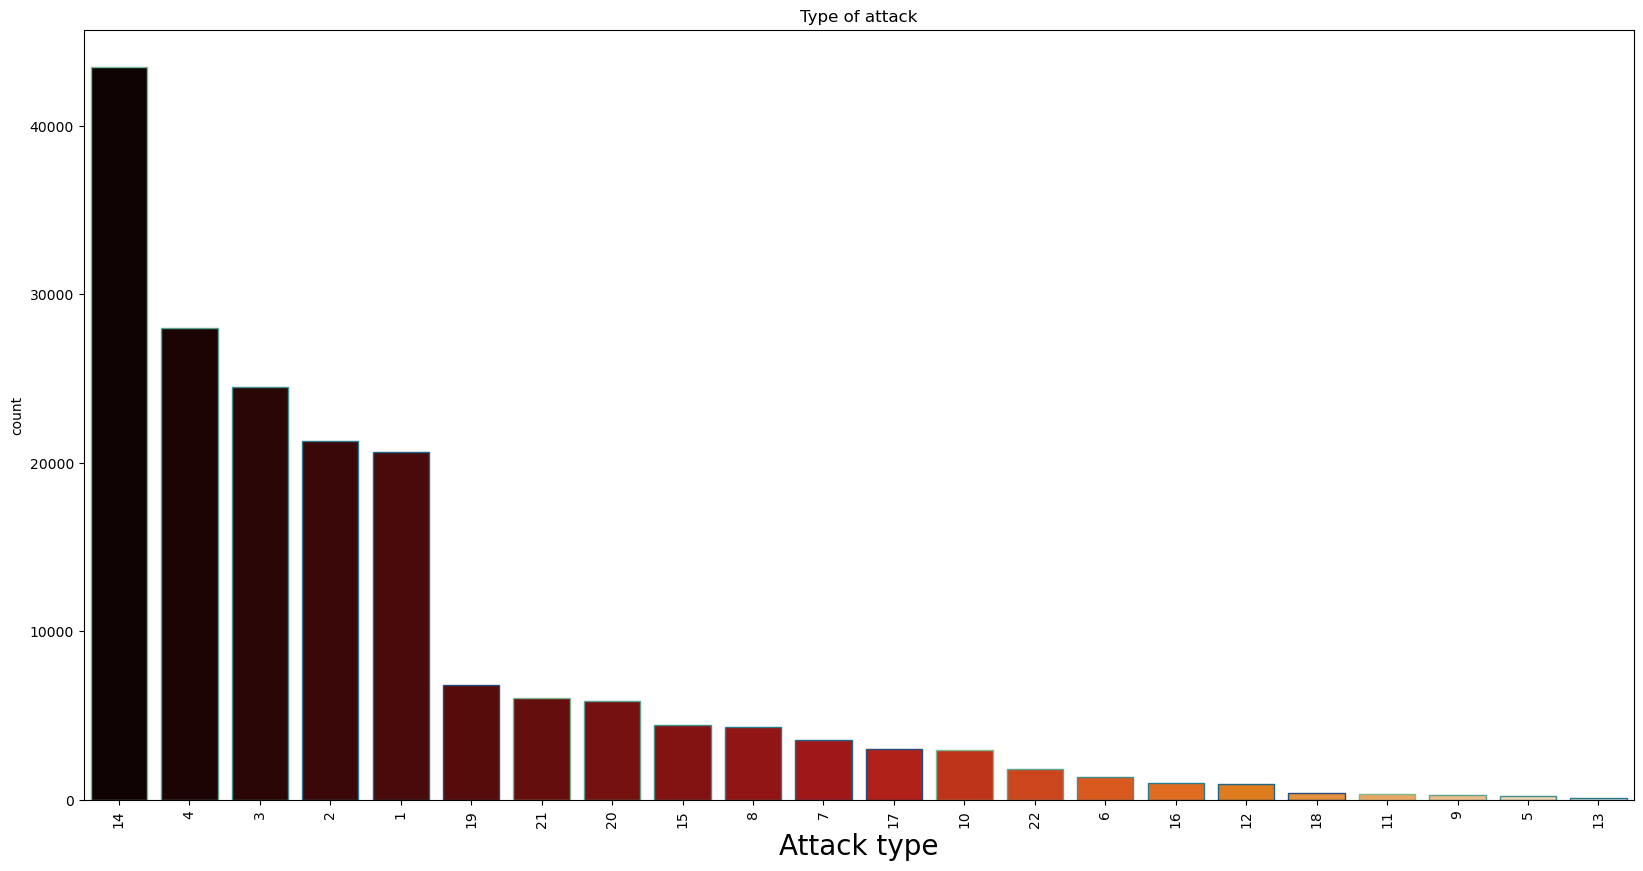

In [16]:
plt.subplots(figsize=(20,10))
sns.countplot(x=pd.Series(data['targtype1']), order=data['targtype1'].value_counts().index, palette='gist_heat', edgecolor=sns.color_palette("crest"))
plt.xticks(rotation=90)
plt.xlabel('Attack type',fontsize=20)
plt.ylabel('count')
plt.title('Type of attack')
plt.show()

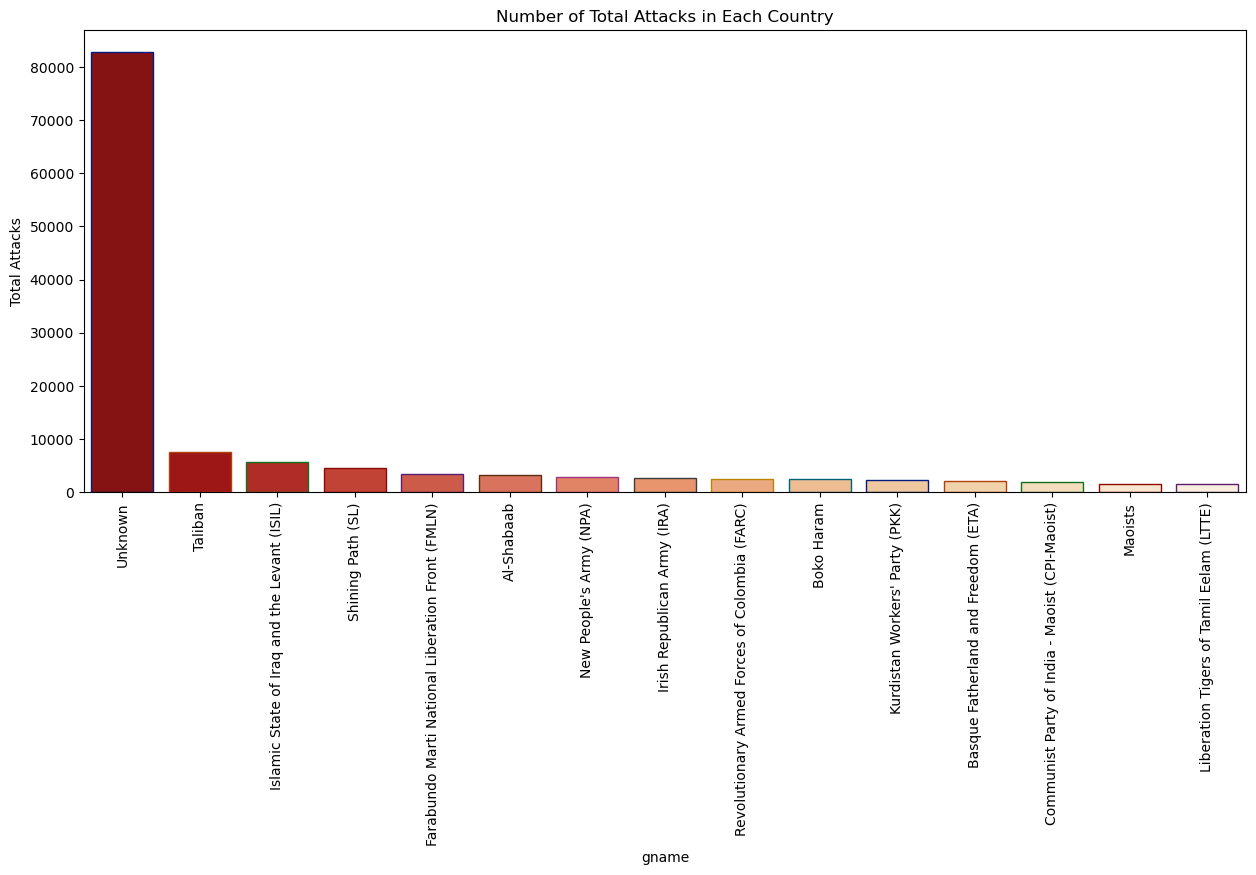

In [17]:
plt.subplots(figsize=(15,6))
country_attacks = data.gname.value_counts()[:15].reset_index()
country_attacks.columns = ['gname', 'Total Attacks']
sns.barplot(x = country_attacks.gname, y = country_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation = 90)
plt.title("Number of Total Attacks in Each Country")
plt.show()

In [18]:
sattk=data.success.value_counts()[:10]
sattk

1    161632
0     20059
Name: success, dtype: int64

In [19]:
data.gname.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64